In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads\weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<function matplotlib.pyplot.show(close=None, block=None)>

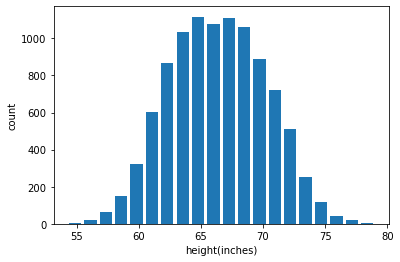

In [10]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('height(inches)')
plt.ylabel('count')
plt.show

In [12]:
df.Height.mean()

66.36755975482106

In [13]:
df.Height.std()

3.847528120773233

In [15]:
upper_limit=df.Height.mean()+3*df.Height.std()

In [16]:
upper_limit

77.91014411714076

In [17]:
lower_limit=df.Height.mean()-3*df.Height.std()

In [18]:
lower_limit

54.82497539250136

In [19]:
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [20]:
df_no_outlier_std_dev=df[(df.Height<upper_limit)&(df.Height>lower_limit)]

In [21]:
df_no_outlier_std_dev

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#outlier detection using Z-score


#calculate the z-score
z=x-mean/std


In [22]:
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()

In [23]:
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [25]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [26]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [27]:
#remove the outlier and produce new dataframe


In [28]:
df_no_outlier=df[(df.zscore>-3)&(df.zscore<3)]

In [29]:
df_no_outlier

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
